# Fish

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
from pathlib import Path

In [3]:
from fastai import *
from fastai.vision import *

## Load data

In [4]:
path = 'data/'

**create a data bunch**

In [5]:
data = ImageDataBunch.from_folder(path, valid_pct=0.2, ds_tfms=get_transforms(), size=224)

**normalize the data**

In [6]:
data.normalize(imagenet_stats)

**visualize the data**

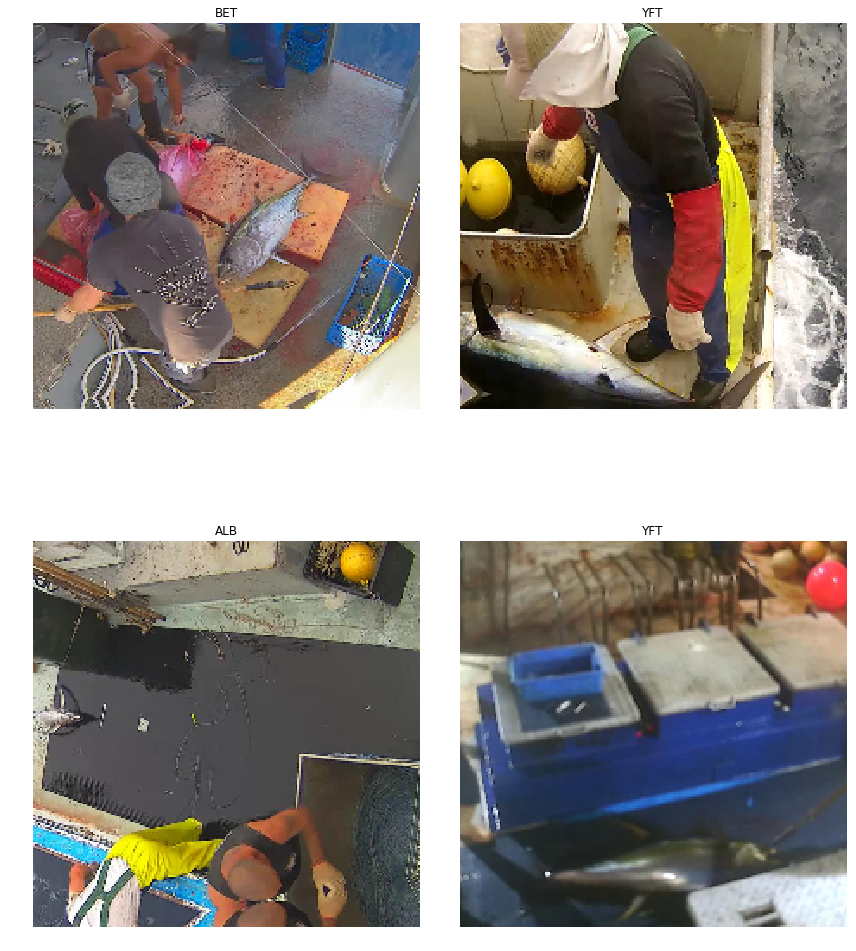

In [30]:
data.show_batch(rows=2)

## create the network

In [8]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [9]:
learn.fit_one_cycle(5)

Total time: 02:53
epoch  train_loss  valid_loss  error_rate
1      1.872408    0.943558    0.283505    (00:35)
2      1.304741    0.682547    0.202320    (00:34)
3      0.987101    0.537127    0.161082    (00:34)
4      0.797321    0.472563    0.139175    (00:34)
5      0.687053    0.466263    0.146907    (00:34)



In [10]:
learn.save('stage1')

## fine tune

In [ ]:
learn.load('stage1')

In [11]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


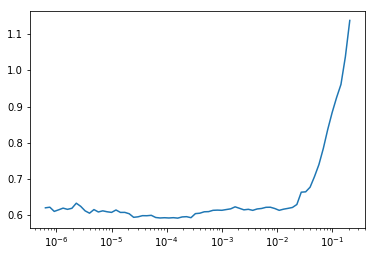

In [12]:
learn.recorder.plot()

In [13]:
learn.unfreeze()

In [14]:
learn.fit_one_cycle(5, max_lr=slice(1e-6, 1e-4))

Total time: 02:55
epoch  train_loss  valid_loss  error_rate
1      0.587009    0.450345    0.140464    (00:34)
2      0.556717    0.419172    0.122423    (00:35)
3      0.529414    0.391183    0.118557    (00:35)
4      0.487881    0.379141    0.109536    (00:35)
5      0.461242    0.377654    0.113402    (00:34)



## Train with Resnet50

In [15]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

In [16]:
learn.fit_one_cycle(5)

Total time: 03:00
epoch  train_loss  valid_loss  error_rate
1      1.590614    0.834997    0.256443    (00:37)
2      1.064852    0.487851    0.152062    (00:36)
3      0.767699    0.357641    0.097938    (00:36)
4      0.583184    0.307848    0.096649    (00:35)
5      0.483299    0.302510    0.092784    (00:35)



In [20]:
learn.save('stage2')

## fine tune

In [ ]:
learn.load('stage2')

In [21]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


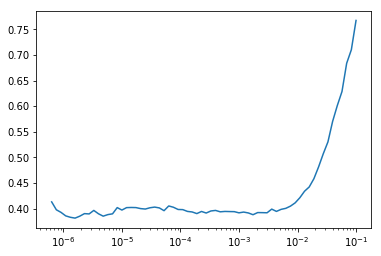

In [22]:
learn.recorder.plot()

In [23]:
learn.unfreeze()

In [24]:
learn.fit_one_cycle(5, max_lr=slice(1e-5, 1e-3))

Total time: 03:03
epoch  train_loss  valid_loss  error_rate
1      0.393175    0.287976    0.088918    (00:36)
2      0.365481    0.278960    0.072165    (00:36)
3      0.288047    0.215570    0.054124    (00:37)
4      0.212179    0.198859    0.050258    (00:36)
5      0.149027    0.202037    0.050258    (00:36)



## interpretation

In [31]:
interp = ClassificationInterpretation.from_learner(learn)

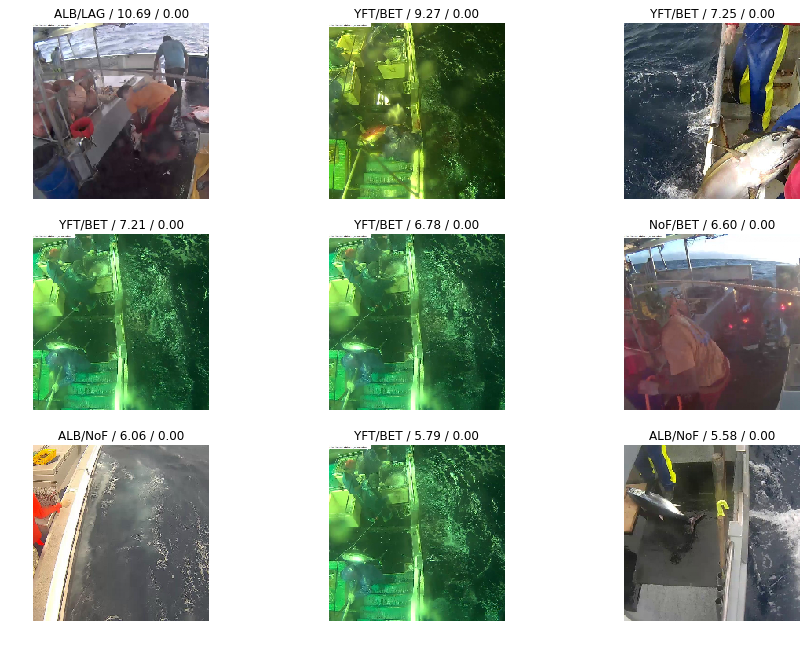

In [32]:
interp.plot_top_losses(9, figsize=(15, 11))

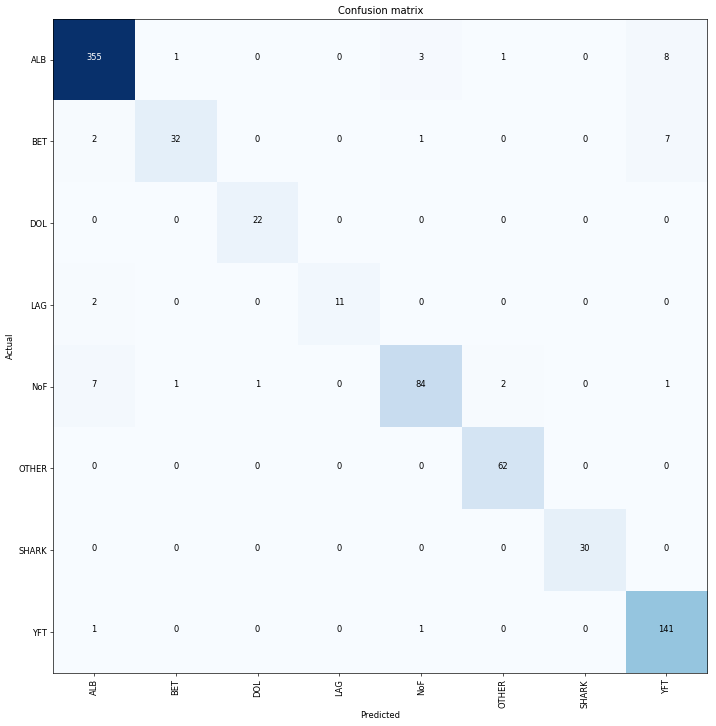

In [33]:
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)

In [34]:
interp.most_confused()

[('ALB', 'YFT', 8),
 ('BET', 'YFT', 7),
 ('NoF', 'ALB', 7),
 ('ALB', 'NoF', 3),
 ('BET', 'ALB', 2),
 ('LAG', 'ALB', 2),
 ('NoF', 'OTHER', 2)]